In [1]:
%pylab inline
plt.rcParams['figure.figsize'] = (8, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

In [21]:
k, H, n, tc = 2.5, 2e-6, 100, 35000

In [31]:
qset = linspace(-0.005, -0.04, 50)
qs = []

In [32]:
for q in qset:
    # setup grid
    x = linspace(0, tc, n)
    dx = tc / (n - 1)
    # create system of equations
    d = ones(n)
    A = spdiags([d, -2*d, d], [-1, 0, 1], n, n, 'csr')
    b = -d * H * dx**2 / k
    # define boundary conditions
    Tl = 0
    A[0, :2] = [1, 0]
    b[0] = Tl
    qr = -0.02
    A[-1, -2:] = [2, -2]
    b[-1] += 2 * q * dx / k
    # solve
    t = spsolve(A, b)
    # store surface heat flow
    qs.append( 1000 * k * (t[1] - t[0]) / dx)

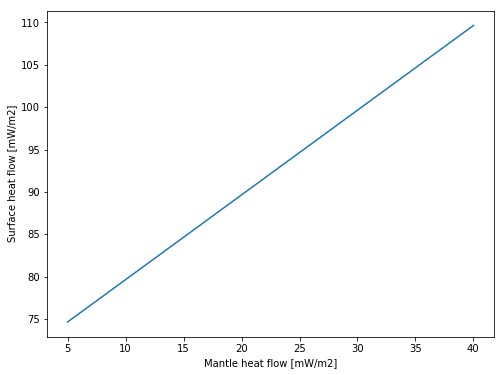

In [33]:
plot(-1000*qset, qs)
xlabel('Mantle heat flow [mW/m2]')
ylabel('Surface heat flow [mW/m2]');